# Merging Tables With Different Join Types

## 🔖 Join Types:

* Basic :
🔸 Inner Join
🔸 Left Join
🔸 Right Join
🔸 Outer Join
🔸 Self Join
🔸 Merging on index

* Advence :
🔹 Semi Join
🔹 Anti Join


## 🔔 Join Method:

* Use **`merge()`**.

* **Join column** : 
    * If join column name are different, use **`right_on='column_name'`** and **`left_on='column_name'`**. 
    * If join column name is same, use **`on='column_name'`**.

* **Join type** : 
    * Use **`how=`**.
    * Inner join : not be setting because default is inner join, or use **`how='inner'`**.
    * Left join : setting **`how='left'`**.
    * Right join : setting **`how='right'`**.
    * Outer join : setting **`how='outer'`**.

* **When join table have same column name** :
    * Use **`suffixes=('_name1', '_name2')`** setting column names.
    * If not use suffixes, join results for same columns will be auto add _x and _y make a distinction.

* **Advence join description** 
    * **<u>Semi Join</u>**:
        * 📌 **Mean**:
            * Take data from A (i.e. left table) that is also in B (i.e. right table).
            * Result only show columns on left table, **not** return columns on right table.
            * No duplicate.

        * 📎 **Method**: 
            * Use inner join.
            * Use `isin()` to get results.
    * **<u>Anti Join</u>**:
        * 📌 **Mean**:
            * Get data from A (i.e. left table) that is not in B (i.e. right table).
            * Result show columns and rows from left table and **not match rows** on the right table.

        * 📎 **Method**: 
            * Use left join.
            * Use `indicator=True` to determine which records only on the left table(i.e. left_only) or on both  
              tables(i.e.both). And will add `_merge` column mark left_only or both.
            * Use `isin()` to get rows on left table but not in right table.    

* **Verifying data integrity** : 
    * Use **`validate=`**.
    * Default setting : 
        * validate=**`None`** or not writing in code.
    * Checks if data merge is of specified type can set:
        * validate=**`'one_to_one'`**
        * validate=**`'one_to_many'`**
        * validate=**`'many_to_one'`**
        * validate=**`'many_to_many'`**
    * If not match specified type, it will show error message.
    * If match specified type, it will show table results.

    
## 🌟 Note:

* If python code have show in multiple rows, can use this symbol **`\`** indicate program wrap.

------------------

## 📓 Read source data - csv file


* **Method**: use `read_csv()` to read csv source files.

* **Data Sources Link**: github datacamp_data_analysis_with_python repository:
  https://github.com/linnelab/datacamp_data_analysis_with_python/tree/main/4_joining_data_with_pandas/datasets/csv_files

* ⭐ **Github Repository Setting**: need to set `public` and use type= `RAW` link on github

In [1]:
import pandas as pd

# source data link
link_movie = 'https://raw.githubusercontent.com/linnelab/datacamp_data_analysis_with_python/main/4_joining_data_with_pandas/datasets/csv_files/movies.csv'
link_movie_genre = 'https://raw.githubusercontent.com/linnelab/datacamp_data_analysis_with_python/main/4_joining_data_with_pandas/datasets/csv_files/movie_to_genres.csv'
link_financial = 'https://raw.githubusercontent.com/linnelab/datacamp_data_analysis_with_python/main/4_joining_data_with_pandas/datasets/csv_files/financials.csv'
link_land_use = 'https://raw.githubusercontent.com/linnelab/datacamp_data_analysis_with_python/main/4_joining_data_with_pandas/datasets/csv_files/land_use.csv'
link_census = 'https://raw.githubusercontent.com/linnelab/datacamp_data_analysis_with_python/main/4_joining_data_with_pandas/datasets/csv_files/census.csv'
link_licenses = 'https://raw.githubusercontent.com/linnelab/datacamp_data_analysis_with_python/main/4_joining_data_with_pandas/datasets/csv_files/licenses.csv'
link_crews = 'https://raw.githubusercontent.com/linnelab/datacamp_data_analysis_with_python/main/4_joining_data_with_pandas/datasets/csv_files/crews.csv'
link_sequels = 'https://raw.githubusercontent.com/linnelab/datacamp_data_analysis_with_python/main/4_joining_data_with_pandas/datasets/csv_files/sequels.csv'
link_top_cust = 'https://raw.githubusercontent.com/linnelab/datacamp_data_analysis_with_python/main/4_joining_data_with_pandas/datasets/csv_files/top_cust.csv'
link_employees = 'https://raw.githubusercontent.com/linnelab/datacamp_data_analysis_with_python/main/4_joining_data_with_pandas/datasets/csv_files/employees.csv'

# read source csv file
movie = pd.read_csv(link_movie, index_col=0)
movie_genre = pd.read_csv(link_movie_genre, index_col=0)
financial = pd.read_csv(link_financial, index_col=0)
land_use = pd.read_csv(link_land_use, index_col=0)
census = pd.read_csv(link_census, index_col=0)
licenses = pd.read_csv(link_licenses, index_col=0)
crews = pd.read_csv(link_crews, index_col=0)
sequels = pd.read_csv(link_sequels, index_col=0)
top_cust = pd.read_csv(link_top_cust, index_col=0)
employees = pd.read_csv(link_employees, index_col=0)

# show part of table records
display(movie.head())
display(movie_genre.head())
display(financial.head())
display(land_use.head())
display(census.head())
display(licenses.head())
display(crews.head())
display(sequels.head())
display(top_cust.head())
display(employees.head())

# print table row and column counts
print('movie table=', movie.shape)
print('movie genre=', movie_genre.shape)
print('financial table=', financial.shape)
print('land use table=', land_use.shape)
print('census table=', census.shape)
print('licenses table=', licenses.shape)
print('crews table=', crews.shape)
print('sequels table=', sequels.shape)
print('top_cust table=', top_cust.shape)
print('employees table=', employees.shape)

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


,ward,residential,commercial,industrial,vacant,other
0,1,41,9,2,2,46
1,2,31,11,6,2,50
2,3,20,5,3,13,59
3,4,22,13,0,7,58
4,5,25,3,1,3,68


,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616.0
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633.0
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632.0
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609.0
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613.0


,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


,id,title,sequel
0,19995,Avatar,NaN
1,862,Toy Story,863.0
2,863,Toy Story 2,10193.0
3,597,Titanic,NaN
4,24428,The Avengers,NaN


,cid,srid,fname,lname,phone,fax,email
0,1,3,Lu?s,Gon?alves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br
1,2,5,Leonie,K?hler,+49 0711 2842222,NaN,leonekohler@surfeu.de
2,3,3,Fran?ois,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com
3,4,4,Bj?rn,Hansen,+47 22 44 22 22,NaN,bjorn.hansen@yahoo.no
4,5,4,Franti?ek,Wichterlov?,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com


,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002/8/14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002/5/1,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2003/5/3,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2003/10/17,steve@chinookcorp.com


movie table= (4803, 4)
movie genre= (12160, 2)
financial table= (3229, 3)
land use table= (50, 6)
census table= (50, 6)
licenses table= (10000, 6)
crews table= (42502, 4)
sequels table= (4803, 3)
top_cust table= (59, 7)
employees table= (8, 6)


## ✍️ Practice - Inner Join
            
*  Inner join multiple tables and find top 10 records for vacant bigger, account (i.e. the number of businesses) less, population on 2010 less.

In [2]:
# inner join three tables and join column is ward
land_cen_lic = land_use.merge(census, on='ward') \
                        .merge(licenses, on='ward', suffixes=('_cen', '_lic'))

# show part of join result
display(land_cen_lic.head())

,ward,residential,commercial,industrial,vacant,other,pop_2000,pop_2010,change,address_cen,zip_cen,account,aid,business,address_lic,zip_lic
0,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622.0
1,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622.0
2,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647.0
3,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622.0
4,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622.0


In [3]:
# group by ward, population on 2010, vacant and count account (i.e. calculate the number of businesses)
pop_vac_lic = land_cen_lic.groupby(['ward', 'pop_2010', 'vacant'], as_index=False).agg({'account':'count'})

# show part of group by results
display(pop_vac_lic.head())

,ward,pop_2010,vacant,account
0,1,56149,2,253
1,2,55805,2,301
2,3,53039,13,173
3,4,54589,7,160
4,5,51455,3,104


In [4]:
# vacant bigger, account = the number of businesses less, population less, so sorted desc, asc, asc
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'], ascending=[False, True, True]).reset_index(drop=True)

# show part of sorted results
display(sorted_pop_vac_lic.head(10))

,ward,pop_2010,vacant,account
0,7,51581,19,80
1,20,52372,15,123
2,10,51535,14,130
3,24,54909,13,98
4,16,51954,13,156
5,3,53039,13,173
6,28,55199,11,189
7,6,52341,8,149
8,34,51599,7,99
9,22,53515,7,156


## ✍️ Practice - Left Join

*  left join table and count rows have missing values for the budget column.

In [5]:
# movie table left join financial table, join column=id
movie_financial = movie.merge(financial, on='id', how='left')

# show part of join records
display(movie_financial.head())

# show join table row and column counts
print('left join table=', movie_financial.shape)

,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0


left join table= (4803, 6)


In [6]:
# count the number of rows with a null value in the budget column.
number_of_missing_fin = movie_financial['budget'].isnull().sum()

print('missing rows=', number_of_missing_fin)

missing rows= 1574


## ✍️ Practice - Right Join
    
*  right join and plot a bar chart of the top 10 movie genre count.

In [7]:
# find the top 10 most popular movies in the movie table
pop_movie = movie.sort_values('popularity', ascending=False).head(10)

# right join table 
pop_movie_genre = movie_genre.merge(pop_movie, left_on='movie_id', right_on='id', how='right')

# show part of table records
display(pop_movie_genre.head())

# print table row and column counts
print('pop movie genre table=', pop_movie_genre.shape)

,movie_id,genre,id,title,popularity,release_date
0,211672,Comedy,211672,Minions,875.581305,2015-06-17
1,211672,Adventure,211672,Minions,875.581305,2015-06-17
2,211672,Animation,211672,Minions,875.581305,2015-06-17
3,211672,Family,211672,Minions,875.581305,2015-06-17
4,157336,Drama,157336,Interstellar,724.247784,2014-11-05


pop movie genre table= (36, 6)


In [8]:
# count the number of pop movie genre
pop_movie_genre_cnt = pop_movie_genre.groupby('genre').agg({'movie_id':'count'})

# show part of table records
display(pop_movie_genre_cnt.head())

# use desc sort column for pop movies gener count
pop_movie_genre_sort = pop_movie_genre_cnt.sort_values('movie_id', ascending=False)

# show sort table results
display(pop_movie_genre_sort)

,movie_id
genre,
Action,7
Adventure,9
Animation,2
Comedy,3
Drama,2


,movie_id
genre,
Adventure,9
Action,7
Science Fiction,6
Thriller,4
Comedy,3
Animation,2
Drama,2
Family,2
Fantasy,1


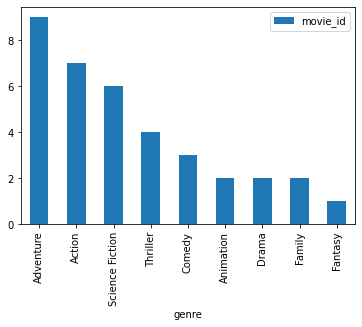

In [9]:
from matplotlib import pyplot as plt

# plot a bar chart of the top 10 genre count for popular movies
pop_movie_genre_sort.plot(kind='bar')
plt.show()

## ✍️ Practice - Outer Join
    
*  outer join two tables. Find top 10 popularity movie title and genre are family and comedy. Output movie id, movie title, popularity, movie release date and sort desc for popularity.

In [10]:
# find movie genre is Family
family = movie_genre[movie_genre['genre'] == 'Family']

# find movie genre is Comedy
comedy = movie_genre[movie_genre['genre'] == 'Comedy']

# outer join family and comedy table on movie_id column
family_comedy = family.merge(comedy, on='movie_id', suffixes=['_fam', '_com'], how='outer')

# show part of table records
display(family_comedy.head())

# show table row and column counts
print(family_comedy.shape)

,movie_id,genre_fam,genre_com
0,12,Family,NaN
1,35,Family,Comedy
2,105,Family,Comedy
3,118,Family,Comedy
4,129,Family,NaN


(1936, 3)


In [11]:
# setting filter expected null value
condition = ((family_comedy['genre_fam'].notnull()) & (family_comedy['genre_com'].notna()))

# show table results
family_comedy_nonull = family_comedy[condition]

# show part of table results
display(family_comedy_nonull.head())

,movie_id,genre_fam,genre_com
1,35,Family,Comedy
2,105,Family,Comedy
3,118,Family,Comedy
5,165,Family,Comedy
6,196,Family,Comedy


In [12]:
# left join family_comedy_nonull and movie table to get title, popularity, and release_date column
family_comedy_movie = family_comedy_nonull.merge(movie, left_on='movie_id', right_on='id', how='left')

# show part of table records
display(family_comedy_movie.head())

# find top 10 popularity movie title and genre are family and comedy
result = family_comedy_movie.sort_values('popularity', ascending=False).head(10)

# get special columns and set index column
result[['movie_id', 'title', 'popularity', 'release_date']].set_index('movie_id')

,movie_id,genre_fam,genre_com,id,title,popularity,release_date
0,35,Family,Comedy,35,The Simpsons Movie,46.875375,2007-07-25
1,105,Family,Comedy,105,Back to the Future,76.603233,1985-07-03
2,118,Family,Comedy,118,Charlie and the Chocolate Factory,53.905592,2005-07-13
3,165,Family,Comedy,165,Back to the Future Part II,43.345252,1989-11-20
4,196,Family,Comedy,196,Back to the Future Part III,45.769562,1990-05-25


,title,popularity,release_date
movie_id,,,
211672,Minions,875.581305,2015-06-17
177572,Big Hero 6,203.734590,2014-10-24
93456,Despicable Me 2,136.886704,2013-06-25
150540,Inside Out,128.655964,2015-06-09
62177,Brave,125.114374,2012-06-21
181533,Night at the Museum: Secret of the Tomb,115.597753,2014-12-17
585,"Monsters, Inc.",106.815545,2001-11-01
82702,How to Train Your Dragon 2,100.213910,2014-06-12
425,Ice Age,99.561972,2002-03-10


## ✍️ Practice - Self Join

* Find rows from the left table with the job of 'Director' and avoids rows with the job of 'Director' in the right table.

* ⭐ **Note**: 
    * Merging a table to itself can be useful when you want to compare values in a column to other values in the same column.
    * When to join at table to itself :
      🔸 Hierarchical relationships 
      🔸 Sequential relationships
      🔸 Graph data

In [13]:
# use inner join to merge self table
crews_self_merged = crews.merge(crews, on='id', suffixes=('_dir', '_crew'))

# show part of self join results
display(crews_self_merged.head(10))

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron
5,19995,Editing,Editor,Stephen E. Rivkin,Art,Set Designer,Richard F. Mays
6,19995,Editing,Editor,Stephen E. Rivkin,Costume & Make-Up,Costume Design,Mayes C. Rubeo
7,19995,Editing,Editor,Stephen E. Rivkin,Camera,Director of Photography,Mauro Fiore
8,19995,Editing,Editor,Stephen E. Rivkin,Costume & Make-Up,Hairstylist,Linda DeVetta
9,19995,Editing,Editor,Stephen E. Rivkin,Crew,Visual Effects Editor,Steve R. Moore


In [14]:
# filter job on left table is 'Director' and job on right table is not 'Director'
filter_crews = crews_self_merged[(crews_self_merged['job_dir'] == 'Director') & (crews_self_merged['job_crew'] != 'Director')]

# show part of filter results
display(filter_crews.head(10))

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays
162,19995,Directing,Director,James Cameron,Costume & Make-Up,Costume Design,Mayes C. Rubeo
163,19995,Directing,Director,James Cameron,Camera,Director of Photography,Mauro Fiore
164,19995,Directing,Director,James Cameron,Costume & Make-Up,Hairstylist,Linda DeVetta
165,19995,Directing,Director,James Cameron,Crew,Visual Effects Editor,Steve R. Moore
166,19995,Directing,Director,James Cameron,Art,Set Designer,Karl J. Martin


## ✍️ Practice - Merging On Index

* Find out which movie sequels earned the most revenue compared to the original movie.

In [15]:
# set index is id column 
fin = financial.set_index('id')
seq = sequels.set_index('id')

# show part of results
display(fin.head())
display(seq.head())

,budget,revenue
id,,
19995,237000000,2.787965e+09
285,300000000,9.610000e+08
206647,245000000,8.806746e+08
49026,250000000,1.084939e+09
49529,260000000,2.841391e+08


,title,sequel
id,,
19995,Avatar,NaN
862,Toy Story,863.0
863,Toy Story 2,10193.0
597,Titanic,NaN
24428,The Avengers,NaN


In [16]:
# need to contain all movie sequel records, so use left join to financial table
seq_fin = seq.merge(fin, on='id', how='left')

# show part of join results
display(seq_fin.head())

,title,sequel,budget,revenue
id,,,,
19995,Avatar,NaN,237000000.0,2.787965e+09
862,Toy Story,863.0,30000000.0,3.735540e+08
863,Toy Story 2,10193.0,90000000.0,4.973669e+08
597,Titanic,NaN,200000000.0,1.845034e+09
24428,The Avengers,NaN,220000000.0,1.519558e+09


In [17]:
# use id inner join sequel for self table, set id column (i.e. movie id) is index
orig_seq = seq_fin.merge(seq_fin, left_on='sequel', right_on='id', right_index=True, suffixes=('_org', '_seq'))

# show part of results
display(orig_seq.head())

,sequel,title_org,sequel_org,budget_org,revenue_org,title_seq,sequel_seq,budget_seq,revenue_seq
id,,,,,,,,,
862,863.0,Toy Story,863.0,30000000.0,373554033.0,Toy Story 2,10193.0,90000000.0,4.973669e+08
863,10193.0,Toy Story 2,10193.0,90000000.0,497366869.0,Toy Story 3,NaN,200000000.0,1.066970e+09
675,767.0,Harry Potter and the Order of the Phoenix,767.0,150000000.0,938212738.0,Harry Potter and the Half-Blood Prince,NaN,250000000.0,9.339592e+08
121,122.0,The Lord of the Rings: The Two Towers,122.0,79000000.0,926287400.0,The Lord of the Rings: The Return of the King,NaN,94000000.0,1.118889e+09
120,121.0,The Lord of the Rings: The Fellowship of the Ring,121.0,93000000.0,871368364.0,The Lord of the Rings: The Two Towers,122.0,79000000.0,9.262874e+08


In [18]:
# use sequel movie revenue substract orginal movie revenue, and add new column called diff
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# show part of results
display(orig_seq.head())

# find diff bigger than zero (i.e. get sequel movie revenue bigger than original movie)
diff_positive = orig_seq[orig_seq['diff'] > 0]

# show resutls
display(diff_positive)

,sequel,title_org,sequel_org,budget_org,revenue_org,title_seq,sequel_seq,budget_seq,revenue_seq,diff
id,,,,,,,,,,
862,863.0,Toy Story,863.0,30000000.0,373554033.0,Toy Story 2,10193.0,90000000.0,4.973669e+08,123812836.0
863,10193.0,Toy Story 2,10193.0,90000000.0,497366869.0,Toy Story 3,NaN,200000000.0,1.066970e+09,569602834.0
675,767.0,Harry Potter and the Order of the Phoenix,767.0,150000000.0,938212738.0,Harry Potter and the Half-Blood Prince,NaN,250000000.0,9.339592e+08,-4253541.0
121,122.0,The Lord of the Rings: The Two Towers,122.0,79000000.0,926287400.0,The Lord of the Rings: The Return of the King,NaN,94000000.0,1.118889e+09,192601579.0
120,121.0,The Lord of the Rings: The Fellowship of the Ring,121.0,93000000.0,871368364.0,The Lord of the Rings: The Two Towers,122.0,79000000.0,9.262874e+08,54919036.0


,sequel,title_org,sequel_org,budget_org,revenue_org,title_seq,sequel_seq,budget_seq,revenue_seq,diff
id,,,,,,,,,,
862,863.0,Toy Story,863.0,30000000.0,373554033.0,Toy Story 2,10193.0,90000000.0,4.973669e+08,123812836.0
863,10193.0,Toy Story 2,10193.0,90000000.0,497366869.0,Toy Story 3,NaN,200000000.0,1.066970e+09,569602834.0
121,122.0,The Lord of the Rings: The Two Towers,122.0,79000000.0,926287400.0,The Lord of the Rings: The Return of the King,NaN,94000000.0,1.118889e+09,192601579.0
120,121.0,The Lord of the Rings: The Fellowship of the Ring,121.0,93000000.0,871368364.0,The Lord of the Rings: The Two Towers,122.0,79000000.0,9.262874e+08,54919036.0
673,674.0,Harry Potter and the Prisoner of Azkaban,674.0,130000000.0,789804554.0,Harry Potter and the Goblet of Fire,NaN,150000000.0,8.959210e+08,106116482.0
...,...,...,...,...,...,...,...,...,...,...
990,11873.0,The Hustler,11873.0,2000000.0,7600000.0,The Color of Money,NaN,13800000.0,5.229398e+07,44693982.0
76,80.0,Before Sunrise,80.0,2500000.0,5535405.0,Before Sunset,132344.0,2700000.0,1.599262e+07,10457210.0
2292,2295.0,Clerks,2295.0,27000.0,3151130.0,Clerks II,NaN,5000000.0,2.688838e+07,23737246.0


In [19]:
# get special columns and sort DESC for diff value
diff_positive[['title_org', 'title_seq', 'diff']].sort_values('diff', ascending=False)

,title_org,title_seq,diff
id,,,
331,Jurassic Park III,Jurassic World,1.144748e+09
272,Batman Begins,The Dark Knight,6.303398e+08
10138,Iron Man 2,Iron Man 3,5.915067e+08
863,Toy Story 2,Toy Story 3,5.696028e+08
10764,Quantum of Solace,Skyfall,5.224703e+08
...,...,...,...
9725,Friday the 13th Part 2,Friday the 13th Part III,1.496729e+07
8374,The Boondock Saints,The Boondock Saints II: All Saints Day,1.059885e+07
76,Before Sunrise,Before Sunset,1.045721e+07


## ✍️ Practice - Semi Join

* Get employees working with top customers.

In [20]:
# step1: inner join
emp_cust_semi = employees.merge(top_cust, on='srid', suffixes=('_emp', '_cust'))

# show results
display(emp_cust_semi)

,srid,lname_emp,fname_emp,title,hire_date,email_emp,cid,fname_cust,lname_cust,phone,fax,email_cust
0,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,1,Lu?s,Gon?alves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br
1,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,3,Fran?ois,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com
2,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,12,Roberto,Almeida,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br
3,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,15,Jennifer,Peterson,+1 (604) 688-2255,+1 (604) 688-8756,jenniferp@rogers.ca
4,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,18,Michelle,Brooks,+1 (212) 221-3546,+1 (212) 221-4679,michelleb@aol.com
5,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,19,Tim,Goyer,+1 (408) 996-1010,+1 (408) 996-1011,tgoyer@apple.com
6,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,24,Frank,Ralston,+1 (312) 332-3232,NaN,fralston@gmail.com
7,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,29,Robert,Brown,+1 (416) 363-8888,NaN,robbrown@shaw.ca
8,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,30,Edward,Francis,+1 (613) 234-3322,NaN,edfrancis@yachoo.ca
9,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,33,Ellie,Sullivan,+1 (867) 920-2233,NaN,ellie.sullivan@shaw.ca


In [21]:
# step2: use isin() to get employees who working with top customers
top_cust_emp = employees[employees['srid'].isin(emp_cust_semi['srid'])]

# show results
display(top_cust_emp)

,srid,lname,fname,title,hire_date,email
2,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2003/5/3,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2003/10/17,steve@chinookcorp.com


## ✍️ Practice - Anti Join

* Get employees not working with top customers.

In [22]:
# step1: left join
empl_cust = employees.merge(top_cust, on='srid', how='left', indicator=True)

# show part of results
display(empl_cust.head())

,srid,lname_x,fname_x,title,hire_date,email_x,cid,fname_y,lname_y,phone,fax,email_y,_merge
0,1,Adams,Andrew,General Manager,2002/8/14,andrew@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2,Edwards,Nancy,Sales Manager,2002/5/1,nancy@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,1.0,Lu?s,Gon?alves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,both
3,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,3.0,Fran?ois,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com,both
4,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,12.0,Roberto,Almeida,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,both


In [23]:
# step2: select the srid column for _merge records is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# show results
print(srid_list)

0     1
1     2
61    6
62    7
63    8
Name: srid, dtype: int64


In [24]:
# step3: get employees table (i.e. left table) use isin() to determine who not working with top customers
non_top_empl = employees[employees['srid'].isin(srid_list)]

# show results
display(non_top_empl)

,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002/8/14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002/5/1,nancy@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,2003/10/17,michael@chinookcorp.com
6,7,King,Robert,IT Staff,2004/1/2,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,2004/3/4,laura@chinookcorp.com


## ✍️ Practice - Verifying table merge type
            
* Use validate to verify data merge type
* If **not** match validate merge type, it will show error message as below.
* If match validate merge type, it will correct show table results.

In [25]:
employees.merge(top_cust, on='srid', validate='one_to_one')

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

In [26]:
employees.merge(top_cust, on='srid', validate='one_to_many')

,srid,lname_x,fname_x,title,hire_date,email_x,cid,fname_y,lname_y,phone,fax,email_y
0,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,1,Lu?s,Gon?alves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br
1,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,3,Fran?ois,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com
2,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,12,Roberto,Almeida,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br
3,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,15,Jennifer,Peterson,+1 (604) 688-2255,+1 (604) 688-8756,jenniferp@rogers.ca
4,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,18,Michelle,Brooks,+1 (212) 221-3546,+1 (212) 221-4679,michelleb@aol.com
5,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,19,Tim,Goyer,+1 (408) 996-1010,+1 (408) 996-1011,tgoyer@apple.com
6,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,24,Frank,Ralston,+1 (312) 332-3232,NaN,fralston@gmail.com
7,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,29,Robert,Brown,+1 (416) 363-8888,NaN,robbrown@shaw.ca
8,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,30,Edward,Francis,+1 (613) 234-3322,NaN,edfrancis@yachoo.ca
9,3,Peacock,Jane,Sales Support Agent,2002/4/1,jane@chinookcorp.com,33,Ellie,Sullivan,+1 (867) 920-2233,NaN,ellie.sullivan@shaw.ca
